In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-24 16:36:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-24 16:36:10 (24.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
# Import the model we made before
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2023-10-24 16:36:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  82.2MB/s    in 0.2s    

2023-10-24 16:36:14 (82.2 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [4]:
# Unzip the model downloaded
!mkdir downloaded_gs_model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [5]:
# Get TensorFlow datasets
import tensorflow_datasets as tfds

In [6]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list)

True


In [7]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ["train", "validation"],
                                             batch_size = 32,
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete8KR2RE/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete8KR2RE/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
# Load in the model
import tensorflow as tf
food_vision = tf.keras.models.load_model("/content/downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [9]:
food_vision.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [10]:
# Evaluate our model on all of the test data
food_vision.evaluate(test_data)

790/790 [==============================] - 138s 158ms/step - loss: 1.5831 - accuracy: 0.5879


[1.5830508470535278, 0.5878812074661255]

In [11]:
# Make all the layers in the base model trainable
for layer in food_vision.layers[1].layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype_policy)

input_1 True <Policy "float32">
rescaling True <Policy "mixed_float16">
normalization True <Policy "float32">
stem_conv_pad True <Policy "mixed_float16">
stem_conv True <Policy "mixed_float16">
stem_bn True <Policy "mixed_float16">
stem_activation True <Policy "mixed_float16">
block1a_dwconv True <Policy "mixed_float16">
block1a_bn True <Policy "mixed_float16">
block1a_activation True <Policy "mixed_float16">
block1a_se_squeeze True <Policy "mixed_float16">
block1a_se_reshape True <Policy "mixed_float16">
block1a_se_reduce True <Policy "mixed_float16">
block1a_se_expand True <Policy "mixed_float16">
block1a_se_excite True <Policy "mixed_float16">
block1a_project_conv True <Policy "mixed_float16">
block1a_project_bn True <Policy "mixed_float16">
block2a_expand_conv True <Policy "mixed_float16">
block2a_expand_bn True <Policy "mixed_float16">
block2a_expand_activation True <Policy "mixed_float16">
block2a_dwconv_pad True <Policy "mixed_float16">
block2a_dwconv True <Policy "mixed_float16

In [12]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [13]:
tf.keras.mixed_precision.global_policy()

<Policy "mixed_float16">

In [14]:
# Creating an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3)


In [15]:
# Creating a model checkpoint callback
ckpt_path = "model_checkpoints/cp.ckpt"
checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path,
                                                monitor = "val_loss",
                                                save_best_only = True,
                                                save_weights_only = True)


In [32]:
# Check what datatype are our labels
ds_info.features["label"]


ClassLabel(shape=(), dtype=int64, num_classes=101)

In [33]:
# Compile food vision model
food_vision.compile(loss = "sparse_categorical_crossentropy",
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                    metrics = ["accuracy"])

In [37]:
# Fit our model
history = food_vision.fit(train_data,
                          epochs = 100,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = int(0.15 * len(test_data)),
                          callbacks = [early_stopping, checkpoint])

Epoch 1/100
2368/2368 [==============================] - 403s 170ms/step - loss: 1.2359 - accuracy: 0.7030 - val_loss: 1.1387 - val_accuracy: 0.7116
Epoch 2/100
2368/2368 [==============================] - 400s 169ms/step - loss: 1.1888 - accuracy: 0.7111 - val_loss: 1.0997 - val_accuracy: 0.7214
Epoch 3/100
2368/2368 [==============================] - 400s 168ms/step - loss: 1.1553 - accuracy: 0.7163 - val_loss: 1.0802 - val_accuracy: 0.7203
Epoch 4/100
2368/2368 [==============================] - 400s 169ms/step - loss: 1.1285 - accuracy: 0.7221 - val_loss: 1.0561 - val_accuracy: 0.7262
Epoch 5/100
2368/2368 [==============================] - 398s 168ms/step - loss: 1.1060 - accuracy: 0.7266 - val_loss: 1.0400 - val_accuracy: 0.7317
Epoch 6/100
2368/2368 [==============================] - 397s 168ms/step - loss: 1.0866 - accuracy: 0.7309 - val_loss: 1.0290 - val_accuracy: 0.7304
Epoch 7/100
2368/2368 [==============================] - 399s 169ms/step - loss: 1.0692 - accuracy: 0.7337

In [34]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

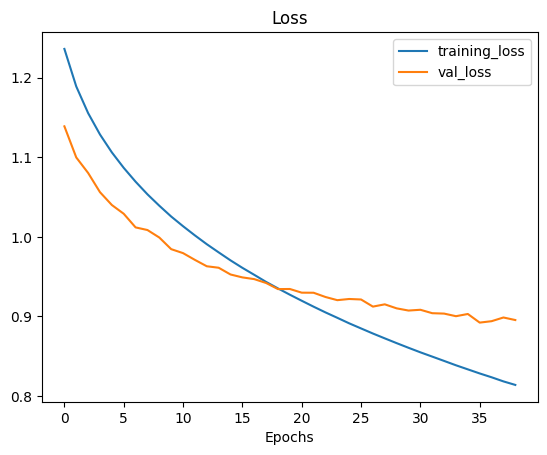

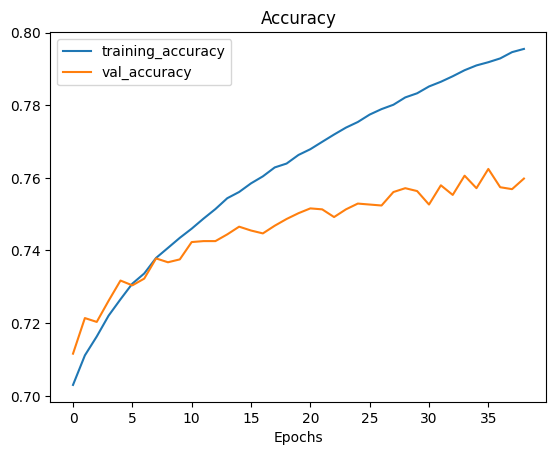

In [38]:
plot_loss_curves(history)